In [ ]:
#Import library yang di perlukan

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [37]:
#Mengambil dataset

!wget -O breast-cancer-wisconsin.data

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [38]:
#Menampilkan dataset

df = pd.read_csv('breast-cancer-wisconsin.data')
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [41]:
#Memvisualisasikan Dataset

df['1000025'].value_counts()

1182404    6
1276091    5
1198641    3
897471     2
1114570    2
          ..
1236043    1
1241232    1
1241559    1
1241679    1
814911     1
Name: 1000025, Length: 644, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd7052d190>]],
      dtype=object)

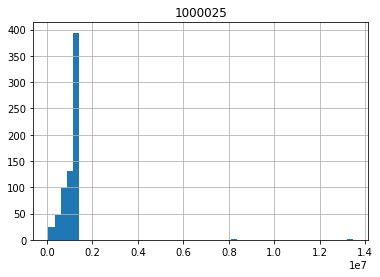

In [42]:
#Menampilkan data dalam bentuk histogram

df.hist(column='1000025', bins=50)

In [43]:
#Format dataset

df.columns

Index(['1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5',
       '2.1'],
      dtype='object')

In [45]:
#Mengkonversi data frame pada panda menjadi array numpy

X = df[['1000025', '5', '1', '1.1']] .values  #.astype(float)
X[0:5]

array([[1002945,       5,       4,       4],
       [1015425,       3,       1,       1],
       [1016277,       6,       8,       8],
       [1017023,       4,       1,       1],
       [1017122,       8,      10,      10]])

In [47]:
#untuk mendefinisikan label (y)

y = df['1000025'].values
y[0:5]

array([1002945, 1015425, 1016277, 1017023, 1017122])

In [48]:
#Menormalisasi Data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.11159121,  0.20709025,  0.28273919,  0.26572479],
       [-0.09136724, -0.50322422, -0.7007423 , -0.74412585],
       [-0.08998657,  0.56224749,  1.59404784,  1.61219231],
       [-0.08877767, -0.14806699, -0.7007423 , -0.74412585],
       [-0.08861724,  1.27256197,  2.24970216,  2.28542607]])

In [49]:
#membagi data testing dan data training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (558, 4) (558,)
Test set: (140, 4) (140,)


In [50]:
#materi KNN
#Import library
from sklearn.neighbors import KNeighborsClassifier

In [51]:
#menentukan nilai K

k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [52]:
#memprediksikan data

yhat = knn.predict(X_test)
yhat[0:5]

array([1096800, 1121919,  625201, 1177512, 1054593])

In [53]:
#menghitung nilai prediksi

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.24193548387096775
Test set Accuracy:  0.0


In [54]:
#Mencari Nilai Terbaik pada data

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.00714286, 0.00714286, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

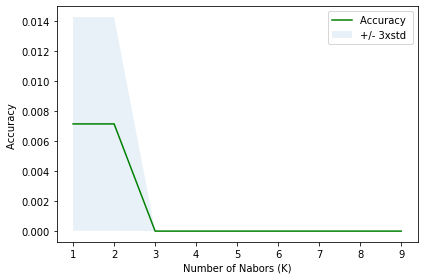

In [55]:
#menampilkan data kebentuk grafik

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [56]:
#menampilkan hasil
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.007142857142857143 with k= 1
